# Network Visualization Tutorial
This tutorial will go through how to select a subset of the drug-target network and generate several visualizations

#1) load a networkx graph into the db_network class object

#2) Select nodes and filter edges

#3a) Visualize ego graph representation

#3b) Visualize network representations




## Step 1) Loading a networkx graph into a db_network object

In [27]:
from operator import itemgetter
import networkx as nx
import matplotlib.pyplot as plt

In [1]:
import db_network as db     ### import db_network

mgraph = db.unpickle('DB_multigraph.obj')    ### Lets unpickle this sample graph
db_net = db.db_network(mgraph)      ## loads the mgraph networkx object into the db_network object

# Step 2) Select nodes and filter edges

In [16]:
edge_filter_dict={'weight': lambda x : x >8.0 and x < 10.5}  ## define this dictionary of filter criterias

In [17]:
## one advantage of the db_net object is that you can chain methods as shown below
## for example, we select the nearest neighbors of protein target 'P11362' and filter based on the edge filet dict
select_network = db_net.get_subsample(['P11362'],False).sel_by_edge_criteria(edge_filter_dict)

# Step 3a) Visualize ego graph representation

In [25]:
## from the selected network, make a ego graph, largest hub is the protein target that is connected to all its related drugs
node_and_degree = select_network.graph.degree()
(largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1))[-1]
hub_ego = nx.ego_graph(select_network.graph, largest_hub)
pos = nx.spring_layout(hub_ego)     ## position dictionary
drug_list=list(set(hub_ego.nodes())-set([largest_hub])) ### list of drugs for labeling

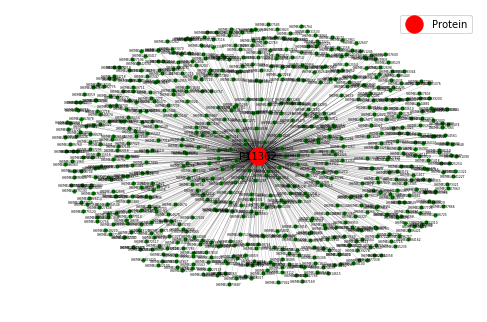

In [50]:
## draw the ego graph
nx.draw(hub_ego, pos, node_color='g', node_size=10, with_labels=False, width=0.1)
nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], node_size=300, node_color='r', label='Protein')
nx.draw_networkx_labels(hub_ego,pos, labels={l:l for l in [largest_hub]},font_size=10)
nx.draw_networkx_labels(hub_ego ,pos, labels={l:l for l in drug_list},font_size=3)
plt.legend()
plt.tight_layout()
plt.show()

# Step 3b) Visualize complex network of 3 protein targets

In [68]:
## make a new network for three related proteins
edge_filter_dict={'weight': lambda x : x >7.0 and x < 10.5}
select_network = db_net.get_subsample(['P00533','P12931','P00519'],False).sel_by_edge_criteria(edge_filter_dict)

In [73]:
pos = nx.spring_layout(select_network.graph)   ## calculate the spring layout position

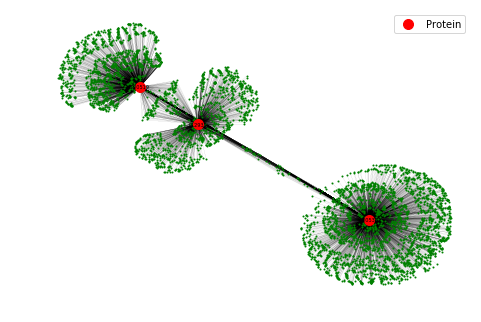

In [79]:
### shows the complex drug-protein network. We can identify drugs that bind to more than one target
nx.draw(select_network.graph,pos,node_size=1,width=0.05,node_color='g')
nx.draw_networkx_nodes(select_network.graph, pos, nodelist=['P00533','P12931','P00519'], node_size=100, node_color='r', label='Protein')
nx.draw_networkx_labels(select_network.graph,pos, labels={l:l for l in ['P00533','P12931','P00519']},font_size=5)
plt.legend()
plt.tight_layout()
plt.show()